1. 전체 3년치 데이터 전부 전처리해서 새 전체 데이터셋 만든다
2. 그걸 다시 지역별로 나눠서 df_sambangdong ... 만든다
3. 각 지역별로 년, 월, 시간대별로 그래프 그리고 상관분석 한다
4. 전체 지역 지도 위에 한눈에 볼 수 있게 분석한다
5. 데이터셋들을 갖고 지역별, 전체 인공지능 모델 예측한다


숙제
1. 보고서의 목차 만들어오기 : 장제목 절제목 결론 → 선행연구 베껴와서 말만 바꾸기 
2. 한 지역에 대한 그래프 샘플 - 9개 상관분석 마지막에 지도 지역별 한 슬라이드로

In [2]:
import pandas as pd

# 파일 경로 설정
file_21 = '/Users/hayden/Desktop/provincial council internship/2021년전체측정소자료.csv'
file_22 = '/Users/hayden/Desktop/provincial council internship/2022년전체측정소자료.csv'
file_23 = '/Users/hayden/Desktop/provincial council internship/2023년전체측정소자료.csv'

# 각각의 CSV 파일을 데이터프레임으로 읽기
df_21 = pd.read_csv(file_21)
df_22 = pd.read_csv(file_22)
df_23 = pd.read_csv(file_23)

# 데이터프레임을 리스트에 담기
dfs = [df_21, df_22, df_23]

# concat 함수를 사용하여 합치기
df = pd.concat(dfs, ignore_index=True)

# 결과 확인
print(df.head())  # 합쳐진 데이터프레임의 첫 부분 출력


       MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2     NO    NOX
0  2021010101     명서동  11.0  22.0  0.022  0.5  0.003  0.023  0.009  0.032
1  2021010102     명서동  12.0  16.0  0.028  0.4  0.003  0.015  0.007  0.022
2  2021010103     명서동  13.0  21.0  0.031  0.4  0.003  0.013  0.006  0.019
3  2021010104     명서동  15.0  19.0  0.028  0.4  0.003  0.013  0.006  0.019
4  2021010105     명서동  15.0  22.0  0.024  0.4  0.003  0.015  0.006  0.021


In [3]:
# 'STTN_NM'이 '이동차', '반송로', '부산항'인 행을 삭제
df = df[~df['STTN_NM'].isin(['이동차', '반송로', '부산항'])]

# 'NO' 및 'NOX' 컬럼을 삭제
df.drop(columns=['NO', 'NOX'], inplace=True)

# 결과 출력
print(df)

# 38만개 * 3 = 114만개 -> 필요없는 데이터 제거 후 106만개 

             MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2
0        2021010101     명서동  11.0  22.0  0.022  0.5  0.003  0.023
1        2021010102     명서동  12.0  16.0  0.028  0.4  0.003  0.015
2        2021010103     명서동  13.0  21.0  0.031  0.4  0.003  0.013
3        2021010104     명서동  15.0  19.0  0.028  0.4  0.003  0.013
4        2021010105     명서동  15.0  22.0  0.024  0.4  0.003  0.015
...             ...     ...   ...   ...    ...  ...    ...    ...
1117136  2023123120     마산항   0.0  11.0  0.037  0.4  0.001  0.013
1117137  2023123121     마산항  15.0  15.0  0.036  0.4  0.001  0.012
1117138  2023123122     마산항   0.0  14.0  0.035  0.4  0.001  0.012
1117139  2023123123     마산항   0.0  11.0  0.032  0.4  0.001  0.014
1117140  2023123124     마산항   0.0  16.0  0.031  0.4  0.001  0.013

[1069978 rows x 8 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069978 entries, 0 to 1117140
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   MSR_DT   1069978 non-null  int64  
 1   STTN_NM  1069978 non-null  object 
 2   PM25     997821 non-null   float64
 3   PM10     1003510 non-null  float64
 4   O3       1018389 non-null  float64
 5   CO       1010370 non-null  float64
 6   SO2      1016054 non-null  float64
 7   NO2      1009708 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 73.5+ MB


In [5]:
# 각 컬럼의 NULL 값 개수 확인
null_counts = df.isnull().sum()

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = df['PM25'].isnull().sum()
PM10_null_count = df['PM10'].isnull().sum()
O3_null_count = df['O3'].isnull().sum()
CO_null_count = df['CO'].isnull().sum()
SO2_null_count = df['SO2'].isnull().sum()
NO2_null_count = df['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
total_null_count = df.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", total_null_count)



PM25 컬럼의 NULL 값 개수: 72157
PM10 컬럼의 NULL 값 개수: 66468
O3 컬럼의 NULL 값 개수: 51589
CO 컬럼의 NULL 값 개수: 59608
SO2 컬럼의 NULL 값 개수: 53924
NO2 컬럼의 NULL 값 개수: 60270
전체 데이터프레임의 NULL 값 개수: 364016


In [6]:
df.describe()

,MSR_DT,PM25,PM10,O3,CO,SO2,NO2
count,1.069978e+06,997821.000000,1.003510e+06,1.018389e+06,1.010370e+06,1.016054e+06,1.009708e+06
mean,2.022111e+09,15.326221,2.853739e+01,3.322246e-02,4.081526e-01,2.933830e-03,1.372420e-02
std,8.155589e+05,10.662294,2.781388e+01,1.854769e-02,1.606304e-01,1.318935e-03,1.024843e-02
min,2.021010e+09,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.021102e+09,8.000000,1.500000e+01,1.900000e-02,3.000000e-01,2.000000e-03,7.000000e-03
50%,2.022080e+09,13.000000,2.300000e+01,3.200000e-02,4.000000e-01,3.000000e-03,1.000000e-02
75%,2.023042e+09,20.000000,3.400000e+01,4.400000e-02,5.000000e-01,3.000000e-03,1.700000e-02
max,2.023123e+09,290.000000,1.260000e+03,2.200000e-01,5.120000e+00,1.520000e-01,1.080000e-01


In [7]:
import pandas as pd
import numpy as np

# 데이터프레임 로드
# df = pd.read_csv('/content/drive/MyDrive/2023년전체측정소자료수정.csv', encoding='cp949')



# 결측치가 있는 열을 선형 보간으로 채우기
for col in df.columns:
    # if df[col].dtype != 'datetime64[ns]':
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# DataFrame 복사본 생성 및 NULL 값 개수 확인
df_copy = df.copy()

# 각 컬럼의 NULL 값 개수 확인
null_counts = df_copy.isnull().sum()

# 특정 컬럼의 NULL 값 개수 확인
PM25_null_count = df_copy['PM25'].isnull().sum()
PM10_null_count = df_copy['PM10'].isnull().sum()
O3_null_count = df_copy['O3'].isnull().sum()
CO_null_count = df_copy['CO'].isnull().sum()
SO2_null_count = df_copy['SO2'].isnull().sum()
NO2_null_count = df_copy['NO2'].isnull().sum()

print("PM25 컬럼의 NULL 값 개수:", PM25_null_count)
print("PM10 컬럼의 NULL 값 개수:", PM10_null_count)
print("O3 컬럼의 NULL 값 개수:", O3_null_count)
print("CO 컬럼의 NULL 값 개수:", CO_null_count)
print("SO2 컬럼의 NULL 값 개수:", SO2_null_count)
print("NO2 컬럼의 NULL 값 개수:", NO2_null_count)

# 전체 데이터프레임의 NULL 값 개수 확인
total_null_count = df_copy.isnull().sum().sum()
print("전체 데이터프레임의 NULL 값 개수:", total_null_count)

/var/folders/6k/r_smdd550yddqpmrhzs0gqyh0000gn/T/ipykernel_48864/2312931886.py:12: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[col] = df[col].interpolate(method='linear', limit_direction='both')


PM25 컬럼의 NULL 값 개수: 0
PM10 컬럼의 NULL 값 개수: 0
O3 컬럼의 NULL 값 개수: 0
CO 컬럼의 NULL 값 개수: 0
SO2 컬럼의 NULL 값 개수: 0
NO2 컬럼의 NULL 값 개수: 0
전체 데이터프레임의 NULL 값 개수: 0


In [8]:
df = df_copy
df.isnull().sum()

MSR_DT     0
STTN_NM    0
PM25       0
PM10       0
O3         0
CO         0
SO2        0
NO2        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1069978 entries, 0 to 1117140
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   MSR_DT   1069978 non-null  int64  
 1   STTN_NM  1069978 non-null  object 
 2   PM25     1069978 non-null  float64
 3   PM10     1069978 non-null  float64
 4   O3       1069978 non-null  float64
 5   CO       1069978 non-null  float64
 6   SO2      1069978 non-null  float64
 7   NO2      1069978 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 73.5+ MB


In [10]:
df_sambang = df[df['STTN_NM'] == '삼방동']
df_sambang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26280 entries, 148920 to 881424
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MSR_DT   26280 non-null  int64  
 1   STTN_NM  26280 non-null  object 
 2   PM25     26280 non-null  float64
 3   PM10     26280 non-null  float64
 4   O3       26280 non-null  float64
 5   CO       26280 non-null  float64
 6   SO2      26280 non-null  float64
 7   NO2      26280 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [11]:
df_sambang

,MSR_DT,STTN_NM,PM25,PM10,O3,CO,SO2,NO2
148920,2021010101,삼방동,10.0,18.0,0.0290,0.30,0.0020,0.0070
148921,2021010102,삼방동,7.0,18.0,0.0260,0.30,0.0020,0.0070
148922,2021010103,삼방동,8.0,24.0,0.0240,0.30,0.0030,0.0090
148923,2021010104,삼방동,7.0,25.0,0.0220,0.30,0.0020,0.0100
148924,2021010105,삼방동,6.0,20.0,0.0180,0.30,0.0020,0.0130
...,...,...,...,...,...,...,...,...
881420,2023123120,삼방동,8.0,15.0,0.0384,0.45,0.0018,0.0107
881421,2023123121,삼방동,8.0,17.0,0.0376,0.44,0.0018,0.0103
881422,2023123122,삼방동,13.0,19.0,0.0325,0.45,0.0019,0.0125
881423,2023123123,삼방동,10.0,23.0,0.0296,0.46,0.0017,0.0131


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# MSR_DT를 datetime 형식으로 변환
df_sambang.loc[:, 'MSR_DT'] = pd.to_datetime(df_sambang['MSR_DT'], format='%Y%m%d%H', errors='coerce')

# 연도, 월, 시간 추출
df_sambang.loc[:, 'Year'] = df_sambang['MSR_DT'].dt.year
df_sambang.loc[:, 'Month'] = df_sambang['MSR_DT'].dt.month
df_sambang.loc[:, 'Hour'] = df_sambang['MSR_DT'].dt.hour


In [15]:
print(df_sambang.head())  # 데이터프레임의 상위 5개 행을 출력하여 확인
print(df_sambang.info())  # 데이터프레임의 열 정보와 데이터 타입을 확인


                    MSR_DT STTN_NM  PM25  PM10     O3   CO    SO2    NO2  \
148920 2021-01-01 01:00:00     삼방동  10.0  18.0  0.029  0.3  0.002  0.007   
148921 2021-01-01 02:00:00     삼방동   7.0  18.0  0.026  0.3  0.002  0.007   
148922 2021-01-01 03:00:00     삼방동   8.0  24.0  0.024  0.3  0.003  0.009   
148923 2021-01-01 04:00:00     삼방동   7.0  25.0  0.022  0.3  0.002  0.010   
148924 2021-01-01 05:00:00     삼방동   6.0  20.0  0.018  0.3  0.002  0.013   

          Year  Month  Hour  
148920  2021.0    1.0   1.0  
148921  2021.0    1.0   2.0  
148922  2021.0    1.0   3.0  
148923  2021.0    1.0   4.0  
148924  2021.0    1.0   5.0  
<class 'pandas.core.frame.DataFrame'>
Index: 26280 entries, 148920 to 881424
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   MSR_DT   25185 non-null  datetime64[ns]
 1   STTN_NM  26280 non-null  object        
 2   PM25     26280 non-null  float64       
 3   PM10     26280 non-null

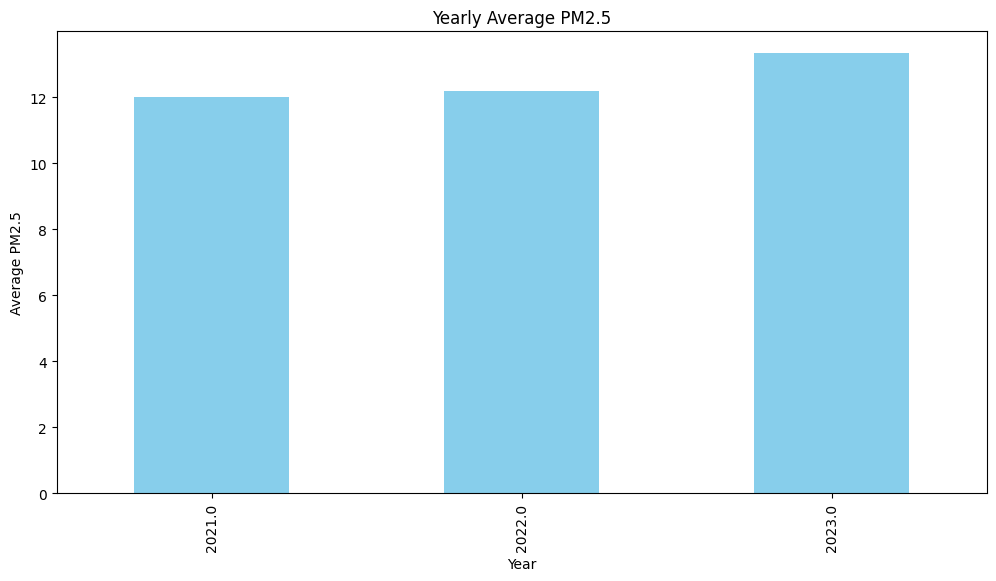

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도별 평균 계산 (numeric only)
yearly_avg = df_sambang.groupby('Year').mean(numeric_only=True)

# 연도별 그래프
plt.figure(figsize=(12, 6))
yearly_avg['PM25'].plot(kind='bar', color='skyblue')
plt.title('Yearly Average PM2.5')
plt.xlabel('Year')
plt.ylabel('Average PM2.5')
plt.show()


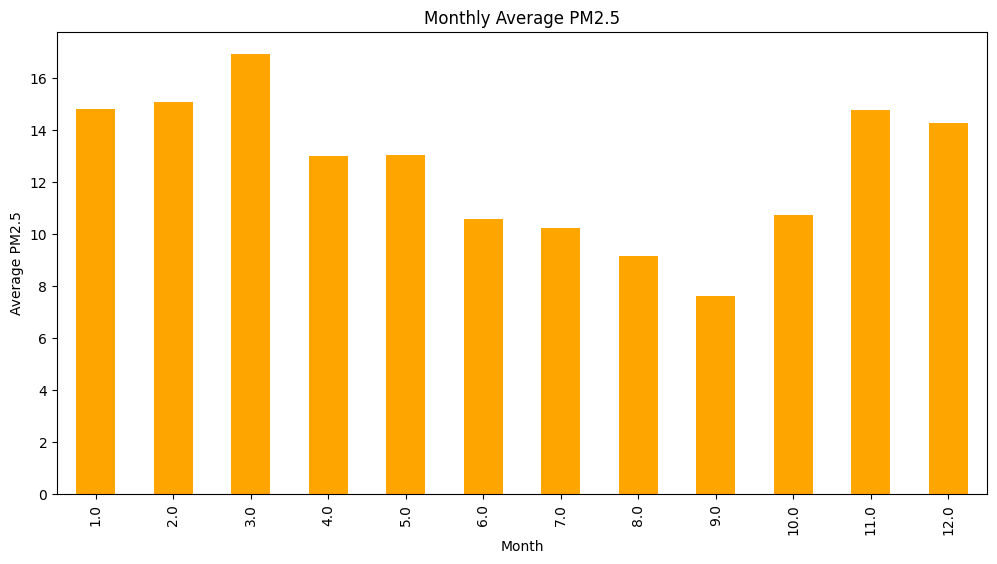

In [20]:
# 월별 평균 계산
monthly_avg = df_sambang.groupby('Month').mean(numeric_only=True)

# 월별 그래프
plt.figure(figsize=(12, 6))
monthly_avg['PM25'].plot(kind='bar', color='orange')
plt.title('Monthly Average PM2.5')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.show()


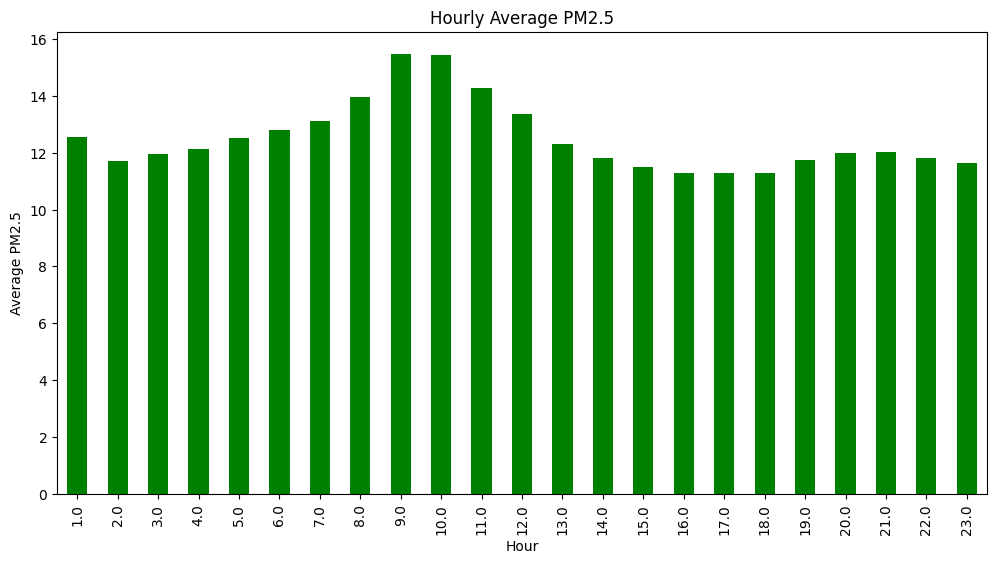

In [21]:
# 시간대별 평균 계산
hourly_avg = df_sambang.groupby('Hour').mean(numeric_only=True)

# 시간대별 그래프
plt.figure(figsize=(12, 6))
hourly_avg['PM25'].plot(kind='bar', color='green')
plt.title('Hourly Average PM2.5')
plt.xlabel('Hour')
plt.ylabel('Average PM2.5')
plt.show()
